1.Lipinski’s Rule of Five (Ro5)筛选

（1）导入包并设置路径

In [1]:
"""
初始化文件
导入所有的模块
创建文件夹
"""
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
from matplotlib.lines import Line2D
from rdkit.Chem.FilterCatalog import FilterCatalog
from rdkit.Chem.FilterCatalog import FilterCatalogParams

# 定义文件路径
data_path = "data"          # 数据存储路径
result_path = "output"      # 结果存储路径
# os.makedirs()函数创建文件夹，exist_ok参数为True表示如果文件夹已存在则不报错
os.makedirs(data_path, exist_ok=True)
os.makedirs(result_path, exist_ok=True)

（2）定义及可视化示例分子

,ChEMBL_ID,smiles,ROMol
0,CHEMBL4108545,C[C@H]1OC(=O)N2C[C@H](c3nc(-c4ccc(C(=O)Nc5cc(C...,
1,CHEMBL4074833,C[C@]1(C(=O)O)CCC[C@@](C)(c2nc(-c3ccc(C(=O)Nc4...,
2,CHEMBL3942777,C[C@@H]1OC(=O)N2C[C@H](c3nc(-c4ccc(C(=O)Nc5cc(...,
3,CHEMBL4108687,CC1(C)OC(=O)N2C[C@H](c3nc(-c4ccc(C(=O)Nc5cc(C(...,

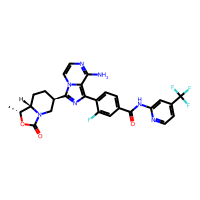
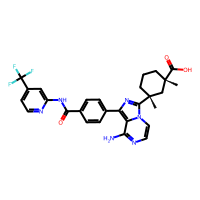
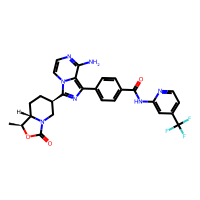
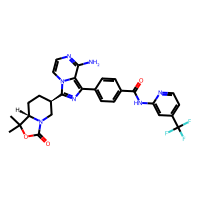

In [2]:
"""
定义及可视化示例分子：
1. 需要用到 pandas 模块、rdkit 中的 Chem 模块、Chem 中的 PandasTools 模块。
2. 使用 pandas 中的 DataFrame() 函数创建数据框。
3. 使用 PandasTools 中的 AddMoleculeColumnToFrame() 函数用于将从SMILES字符串生成的分子对象添加到数据框中。
"""

# 定义示例分子的SMILES字符串和ChEMBL ID
smiles_list = [
    "C[C@H]1OC(=O)N2C[C@H](c3nc(-c4ccc(C(=O)Nc5cc(C(F)(F)F)ccn5)cc4F)c4c(N)nccn34)CC[C@@H]12",
    "C[C@]1(C(=O)O)CCC[C@@](C)(c2nc(-c3ccc(C(=O)Nc4cc(C(F)(F)F)ccn4)cc3)c3c(N)nccn23)C1",
    "C[C@@H]1OC(=O)N2C[C@H](c3nc(-c4ccc(C(=O)Nc5cc(C(F)(F)F)ccn5)cc4)c4c(N)nccn34)CC[C@@H]12",
    "CC1(C)OC(=O)N2C[C@H](c3nc(-c4ccc(C(=O)Nc5cc(C(F)(F)F)ccn5)cc4)c4c(N)nccn34)CC[C@H]21",
]
ChEMBL_ID = ["CHEMBL4108545", "CHEMBL4074833",
             "CHEMBL3942777", "CHEMBL4108687"]

# 创建包含ChEMBL_ID和smiles两列的数据框
molecules = pd.DataFrame({"ChEMBL_ID": ChEMBL_ID,
                          "smiles": smiles_list})

# 向数据框中添加分子对象列
PandasTools.AddMoleculeColumnToFrame(molecules, "smiles")

# 可视化数据框
molecules

（3）计算及输出示例分子Ro5性质

,ChEMBL_ID,smiles,ROMol,molecular_weight,n_hba,n_hbd,logp
0,CHEMBL4108545,C[C@H]1OC(=O)N2C[C@H](c3nc(-c4ccc(C(=O)Nc5cc(C...,,569.179850,8,2,4.8704
1,CHEMBL4074833,C[C@]1(C(=O)O)CCC[C@@](C)(c2nc(-c3ccc(C(=O)Nc4...,,552.209673,7,3,5.5672
2,CHEMBL3942777,C[C@@H]1OC(=O)N2C[C@H](c3nc(-c4ccc(C(=O)Nc5cc(...,,551.189272,8,2,4.7313
3,CHEMBL4108687,CC1(C)OC(=O)N2C[C@H](c3nc(-c4ccc(C(=O)Nc5cc(C(...,,565.204922,8,2,5.1214

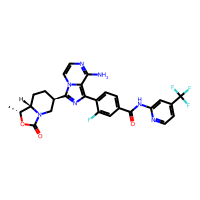
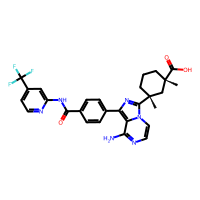
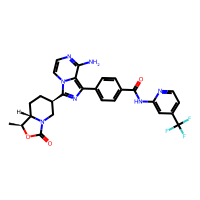
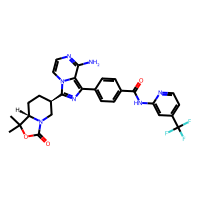

In [3]:
"""
计算及输出示例分子Ro5性质：
1. 需要用到 pandas 模块、 rdkit 中的 Chem 模块、Chem 中的 Descriptors 模块。
2. 使用 pandas 中的 apply() 方法将每个分子的性质计算到数据框中。
3. 使用 Descriptors 中的 ExactMolWt() 函数计算分子的分子量。
4. 使用 Descriptors 中的  NumHAcceptors() 函数计算分子的氢键受体数。
5. 使用 Descriptors 中的  NumHDonors() 函数计算分子的氢键供体数。
6. 使用 Descriptors 中的  MolLogP() 函数计算分子的分配系数。
"""

# 计算分子Ro5性质
molecules["molecular_weight"] = molecules["ROMol"].apply(
    Descriptors.ExactMolWt)
molecules["n_hba"] = molecules["ROMol"].apply(
    Descriptors.NumHAcceptors)
molecules["n_hbd"] = molecules["ROMol"].apply(
    Descriptors.NumHDonors)
molecules["logp"] = molecules["ROMol"].apply(
    Descriptors.MolLogP)

# 输出更新后的分子及其性质
molecules

（4）将示例分子Ro5性质可视化为柱状图

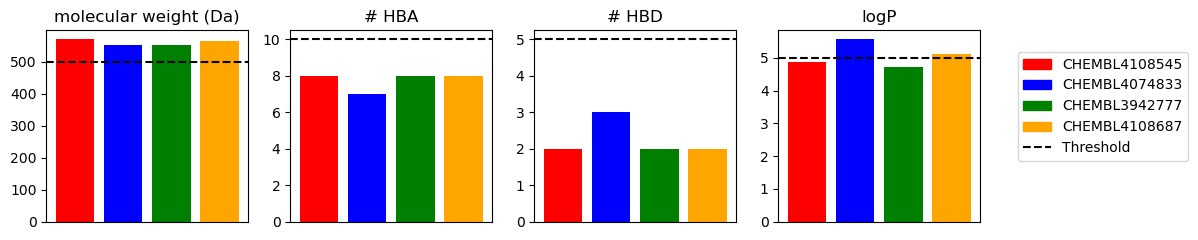

In [4]:
"""
将示例分子Ro5性质可视化为柱状图：
1. 需要用到 matplotlib 模块。
2. 使用 matplotlib.pyplot 中的 subplots() 函数创建图形和子图。
3. 使用 bar() 方法绘制柱状图。
4. 使用 axhline() 方法绘制阈值线。
5. 使用 set_title() 方法设置子图标题。
6. 使用 set_xticks() 方法设置 x 轴刻度。
7. 使用 mpatches.Patch 创建图例的颜色块。
8. 使用 Line2D 创建图例的线条。
9. 使用 legend() 方法创建图例。
10. 使用 tight_layout() 方法调整图形布局。
"""

# 定义Ro5性质及其阈值
ro5_properties = {
    "molecular_weight": (500, "molecular weight (Da)"),  
    "n_hba": (10, "# HBA"), 
    "n_hbd": (5, "# HBD"),  
    "logp": (5, "logP"),  
}

# 创建图形和子图，设置图形大小和子图数量
fig, axes = plt.subplots(figsize=(10, 2.5), 
                         nrows=1, ncols=4)
# 设置颜色列表
colors = ["red", "blue", "green", "orange"]

# 使用 enumerate() 函数和 items() 方法绘制每个性质的柱状图
for index, (key, (threshold, title)) in enumerate(
    ro5_properties.items()
):
    axes[index].bar([1, 2, 3, 4], molecules[key], 
                    color=colors)  
    axes[index].axhline(y=threshold, color="black",
                        linestyle="dashed")
    axes[index].set_title(title)
    axes[index].set_xticks([])

# 创建图例，设置颜色、标签、线条、位置
legend_elements = [
    mpatches.Patch(color=colors[i], 
                   label=row["ChEMBL_ID"])  
    for i, row in molecules.iterrows()
]
legend_elements.append(
    Line2D(
        [0], [0], 
        color="black", 
        ls="dashed", 
        label="Threshold"
    )
)
fig.legend(handles=legend_elements, 
           bbox_to_anchor=(1.2, 0.8))  

# 显示图形
plt.tight_layout()
plt.show()

（5）判断示例分子是否符合Ro5原则

In [5]:
"""
判断示例分子是否符合Ro5原则：
1. 需要用到 pandas 模块、 rdkit 中的 Chem 模块、Chem 中的 Descriptors 模块。
2. 使用 Descriptors 中的 ExactMolWt()、NumHAcceptors()、NumHDonors()、MolLogP() 函数计算分子 Ro5 属性。
3. 使用 pandas 中的 Series() 方法将计算结果存储为可操作的数据结构。
4. 使用 zip 函数和 for 循环遍历数据框中的分子。
"""

def calculate_ro5_properties(smiles):
    # 将SMILES字符串转换为分子对象
    molecule = Chem.MolFromSmiles(smiles)
    
    # 计算分子Ro5属性
    molecular_weight = Descriptors.ExactMolWt(molecule)  # 分子量
    n_hba = Descriptors.NumHAcceptors(molecule)          # 氢键受体数
    n_hbd = Descriptors.NumHDonors(molecule)             # 氢键供体数
    logp = Descriptors.MolLogP(molecule)                 # LogP值
    
    # 判断分子是否符合Ro5原则的条件
    conditions = [molecular_weight <= 500, 
                  n_hba <= 10, n_hbd <= 5, logp <= 5]
    ro5_fulfilled = sum(conditions) >= 3  # 满足Ro5原则的条件数不少于3个
    
    # 使用 pandas 中的 Series() 方法将结果存储为 Series 对象
    return pd.Series(
        [molecular_weight, n_hba, 
         n_hbd, logp, ro5_fulfilled],
        index=["molecular_weight", "n_hba", 
               "n_hbd", "logp", "ro5_fulfilled"]
    )

# 输出每个分子是否符合Ro5原则
for ChEMBL_ID, smiles in zip(molecules["ChEMBL_ID"], 
                             molecules["smiles"]):
    # 计算Ro5属性并打印结果
    ro5_result = calculate_ro5_properties(smiles)
    print(
    f"Ro5 fulfilled for {ChEMBL_ID}: "
    f"{ro5_result['ro5_fulfilled']}"
)

Ro5 fulfilled for CHEMBL4108545: True
Ro5 fulfilled for CHEMBL4074833: False
Ro5 fulfilled for CHEMBL3942777: True
Ro5 fulfilled for CHEMBL4108687: False


（6）对BTK数据集进行Ro5筛选

In [6]:
"""
对BTK数据集进行Ro5筛选：
1. 需要用到 os 模块、 pandas 模块。
2. 使用 os.path.join() 函数拼接文件路径。
3. 使用 pandas 中的 read_csv() 函数读取 CSV 文件。
4. 使用 pandas 中的 apply() 方法将函数应用于数据框中的每个元素。
5. 使用 pandas 中的 concat() 方法合并数据框。
6. 使用 pandas 中的 to_csv() 方法输出数据框到 CSV 文件。
7. 使用布尔索引筛选符合或不符合 Ro5 原则的分子。
"""

# 定义文件路径
molecules_path = os.path.join(data_path, 
                              "BTK_compounds_Q06187.csv")
output_path    = os.path.join(result_path, 
                              "BTK_compounds_Ro5_all.csv")
ro5_path       = os.path.join(result_path, 
                              "BTK_compounds_Ro5_filtered.csv")

# 使用 pd.read_csv() 函数读取CSV文件, index_col参数设置索引列
molecules = pd.read_csv(molecules_path, index_col=0)

# 使用 pandas 中的 apply() 方法将 calculate_ro5_properties 函数应用于数据框中的每个 SMILES 字符串
ro5_properties = molecules["smiles"].apply(
    calculate_ro5_properties)

# 使用 pd.concat() 方法合并原始数据框和计算的Ro5属性
molecules = pd.concat([molecules, ro5_properties], axis=1)

# 使用 pd.to_csv() 方法输出所有分子的筛选结果到CSV文件
molecules.to_csv(output_path)

# 使用布尔索引筛选符合和不符合Ro5原则的分子
molecules_ro5_fulfilled = molecules[molecules["ro5_fulfilled"]]
molecules_ro5_violated = molecules[~molecules["ro5_fulfilled"]]

# 输出整体过滤情况
print(f"筛选数据集中总分子数: {molecules.shape[0]}")
print(f"符合Ro5原则的分子数: {molecules_ro5_fulfilled.shape[0]}")
print(f"不符合Ro5原则的分子数: {molecules_ro5_violated.shape[0]}")

# 使用 pd.to_csv() 方法输出符合Ro5原则的分子到CSV文件
molecules_ro5_fulfilled.to_csv(ro5_path)

筛选数据集中总分子数: 3047
符合Ro5原则的分子数: 2153
不符合Ro5原则的分子数: 894


2.Pan Assay Interference Compounds (PAINS)及Brenk过滤

（1）定义并读取文件

In [7]:
Ro5_all_path = os.path.join(result_path,
                            "BTK_compounds_Ro5_all.csv")
BTK_data = pd.read_csv(Ro5_all_path, index_col=0)

（2）PAINS过滤

In [8]:
"""
PAINS过滤：
1. 需要用到 os 模块、tqdm 模块、pandas 模块、rdkit 中的 Chem 模块、Chem 中的 FilterCatalog 模块。
2. 使用 FilterCatalogParams() 函数创建过滤器目录参数对象。
3. 使用 AddCatalog() 函数向参数对象中添加 PAINS 过滤器目录。
4. 使用 FilterCatalog() 函数创建过滤器目录。
5. 使用 Chem.MolFromSmiles() 函数将 SMILES 字符串转换为分子对象。
6. 使用 catalog.GetFirstMatch() 方法查找分子中的 PAINS 结构。
7. 使用 tqdm() 函数创建一个进度条，显示迭代进度。
8. 使用 pandas 数据框操作将 PAINS 匹配结果添加到数据框中。
9. 使用 os.path.join() 函数拼接文件路径。
10. 使用 pandas 的 to_csv() 方法将数据框输出到 CSV 文件。
11. 使用布尔索引筛选符合和不符合 PAINS 结构的分子。
"""

# 创建一个过滤器目录参数对象   
params = FilterCatalogParams()
# 添加 PAINS 过滤器目录
params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS)
# 创建一个过滤器目录
catalog = FilterCatalog(params)

# 查找PAINS
pains_match = []  # 存储PAINS匹配结果的布尔值
for index, row in tqdm(BTK_data.iterrows(), 
                       total=BTK_data.shape[0]):
    molecule = Chem.MolFromSmiles(row.smiles)
    entry = catalog.GetFirstMatch(molecule)  # 获得第一个匹配的PAINS
    if entry is not None:
        pains_match.append(1)  # 表示有PAINS匹配
    else:
        pains_match.append(0)

# 将PAINS匹配结果的布尔值添加到BTK_data中
BTK_data['PAINS_match'] = pains_match

# 输出所有分子的过滤结果到CSV文件
BTK_compounds_Ro5_PAINS_all_path = os.path.join(
    result_path, "BTK_compounds_Ro5_PAINS_all.csv")
BTK_data.to_csv(BTK_compounds_Ro5_PAINS_all_path)

# 筛选符合过滤条件的分子（PAINS匹配为0且符合Ro5原则）
filtered_data = BTK_data[(BTK_data['PAINS_match'] == 0) & (
    BTK_data['ro5_fulfilled'] == True)]

# 输出符合过滤条件的分子到CSV文件
BTK_compounds_Ro5_PAINS_filtered_path = os.path.join(
    result_path, "BTK_compounds_Ro5_PAINS_filtered.csv")
filtered_data.to_csv(BTK_compounds_Ro5_PAINS_filtered_path)

# 输出过滤信息
print(f"含有PAINS结构的分子数: {sum(pains_match)}")
print(
    f"不含PAINS结构的分子数: "
    f"{len(pains_match) - sum(pains_match)}"
)

100%|█████████████████████████████████████████████████████████████████████████████| 3047/3047 [00:23<00:00, 129.95it/s]

含有PAINS结构的分子数: 133
不含PAINS结构的分子数: 2914


（3）Brenk过滤

In [9]:
"""
Brenk过滤：
1. 需要用到 os 模块、 pandas 模块、rdkit 中的 Chem 模块、tqdm 模块。
2. 使用 os.path.join() 函数拼接文件路径。
3. 使用 pandas 中的 read_csv() 函数读取 CSV 文件。
4. 使用 Chem.MolFromSmiles() 和 Chem.MolFromSmarts() 函数将 SMILES 和 SMARTS 字符串转换为分子对象。
5. 使用 HasSubstructMatch() 方法查找分子中的警示子结构。
6. 使用 tqdm() 函数创建一个进度条，显示迭代进度。
7. 使用 pandas 数据框操作将警示子结构匹配结果添加到数据框中。
8. 使用 pandas 的 to_csv() 方法将数据框输出到 CSV 文件。
9. 使用布尔索引筛选符合和不符合警示子结构的分子。
"""

# 加载数据
BTK_compounds_Ro5_PAINS_all_path = os.path.join(
    result_path, 
    "BTK_compounds_Ro5_PAINS_all.csv"
)
BTK_data = pd.read_csv(BTK_compounds_Ro5_PAINS_all_path,
                       index_col=0)

# 加载Brenk警示子结构文件
unwanted_substructures_path = os.path.join(
    data_path, "unwanted_substructures.csv")
substructures = pd.read_csv(
    unwanted_substructures_path, sep="\\s+")
substructures["molecule_object"] = substructures.smarts.apply(
    Chem.MolFromSmarts)

# 查找警示结构
matches = []  # 存储匹配结果
clean = []  # 存储不含警示子结构的分子索引

# 使用 tqdm() 创建进度条，并遍历数据框中的每一行
for index, row in tqdm(BTK_data.iterrows(), 
                       total=BTK_data.shape[0]):
    # 将 SMILES 字符串转换为分子对象
    molecule = Chem.MolFromSmiles(row.smiles)
    # 初始化匹配标志为 False，表示当前分子尚未匹配任何警示子结构
    match = False
    # 初始化匹配的子结构列表为空，用于存储当前分子匹配到的所有警示子结构名称
    matched_substructures = []
    
    # 查找分子中的警示子结构
    for _, substructure in substructures.iterrows():
        # 如果分子中含有警示子结构
        if molecule.HasSubstructMatch(
            substructure.molecule_object):
            # 将匹配结果存储在 matches 列表中
            matches.append({
                "chembl_id": row.IDs,
                "molecule_object": molecule,
                "substructure": substructure.molecule_object,
                "substructure_name": substructure["name"],
                "Brenk_match": 1
            })
            match = True
            matched_substructures.append(substructure["name"])
    
    # 更新匹配结果
    if not match:
        # 如果没有匹配警示子结构，将分子索引添加到 clean 列表
        clean.append(index)
        match_value = 0
    else:
        match_value = 1
    
    # 在数据框中记录匹配结果
    BTK_data.at[index, "Brenk_match"] = match_value
    BTK_data.at[index, "Unwanted_Substructures"] = ";".join(
        matched_substructures)

# 将匹配结果转换为数据框
matches_df = pd.DataFrame(matches)

# 输出所有分子过滤结果到CSV文件
BTK_compounds_Ro5_PAINS_Brenk_all_path = os.path.join(
    result_path, 
    "BTK_compounds_Ro5_PAINS_Brenk_all.csv"
)
BTK_data.to_csv(BTK_compounds_Ro5_PAINS_Brenk_all_path)

# 筛选符合过滤条件的分子（符合Ro5原则、PAINS匹配为0、Brenk匹配为0）
filtered_data = BTK_data[
    (BTK_data['ro5_fulfilled'] == True) & 
    (BTK_data['PAINS_match'] == 0) & 
    (BTK_data['Brenk_match'] == 0)
]
filtered_data = filtered_data.drop(
    columns=['Unwanted_Substructures'])

# 输出符合过滤条件的分子到CSV文件
BTK_compounds_Ro5_PAINS_Brenk_filtered_path = os.path.join(
    result_path,
    "BTK_compounds_Ro5_PAINS_Brenk_filtered.csv"
)
filtered_data.to_csv(BTK_compounds_Ro5_PAINS_Brenk_filtered_path)

# 输出过滤信息
count = len(BTK_data[BTK_data['Brenk_match'] == 1])
print(f"含警示结构分子数: {count}")
print(f"不含警示结构分子数: {len(BTK_data) - count}")

100%|█████████████████████████████████████████████████████████████████████████████| 3047/3047 [00:23<00:00, 130.22it/s]

含警示结构分子数: 1416
不含警示结构分子数: 1631


（4）警示结构展示

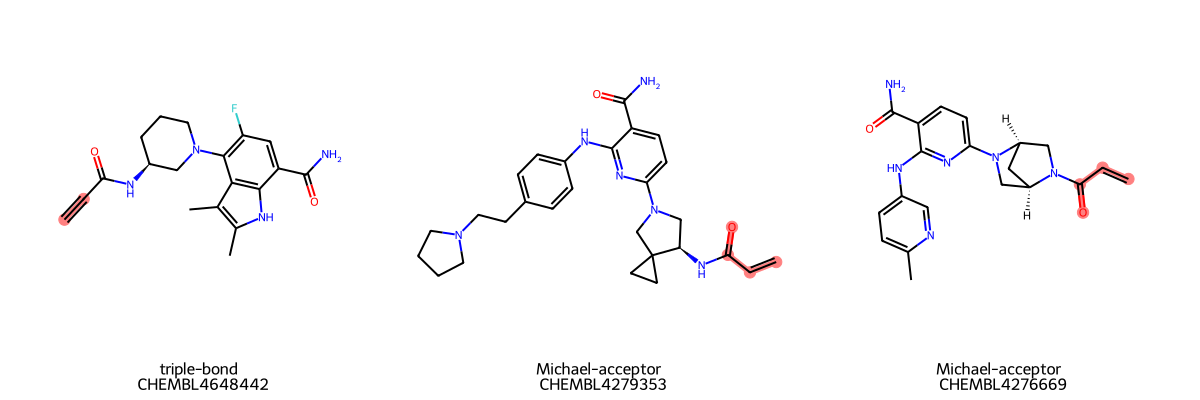

In [10]:
"""
警示结构展示：
1. 需要用到 pandas 模块、rdkit 中的 Chem 模块。
2. 使用 iterrows() 方法遍历 DataFrame 中的行。
3. 使用 rdkit.Chem.Mol.GetSubstructMatch() 方法获取分子中子结构的匹配原子索引。
4. 使用 rdkit.Chem.Draw.MolsToGridImage() 方法绘制分子网格图像。
"""

# 为前3个匹配分子生成高亮子结构匹配信息
highlight = [
    # 获取当前行中分子与子结构匹配的原子索引
    row.molecule_object.GetSubstructMatch(row.substructure)  
    # iterrows() 方法用于逐行遍历数据框
    for _, row in matches_df.head(3).iterrows()  
]

# 使用 Chem.Draw.MolsToGridImage() 方法绘制分子网格图像
Chem.Draw.MolsToGridImage(
    list(matches_df.head(3).molecule_object),  # 前3个匹配分子的分子对象列表
    highlightAtomLists=highlight,  # 高亮显示的原子列表
    subImgSize=(400, 400),  # 每个子图像的大小
    legends=[
        f"{name} \n {chembl_id}" 
        for chembl_id, name in zip(
            matches_df.head(3)['chembl_id'], 
            matches_df.head(3)['substructure_name']
        )  # 每个分子的图例，包含化合物ID和子结构名称
    ],
)